In [ ]:
#hide
from topological_mott_insulator.unrestricted import *
from topological_mott_insulator.restricted import *
from topological_mott_insulator.utils import *
from matplotlib import pyplot as plt
from matplotlib import transforms
from matplotlib.collections import LineCollection
import matplotlib.colors as colors
import matplotlib as mpl
from scipy.interpolate import interp1d
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import numpy as np
from fastprogress.fastprogress import progress_bar, master_bar

ModuleNotFoundError: No module named 'topological_mott_insulator'

In [ ]:
#hide
#all_slow

# Unrestricted mean field

As an example, we perform a simple self-consistent algorithm of the unrestricted Hartree-Fock method to compare between site-nematic and quantum anomalous Hall phases.

In [ ]:
t0, jax, jay, jbx, jby = -1, 0.5, -0.5, -0.5, 0.5 # We fix the hopping parameters of the Hamiltonian

## Site-nematic phase

In [ ]:
#hide_output
nx, ny = 12, 12

v1, v2 = 4., 1.
v3, v4 = Rydberg_v3v4(v1,v2)
un_mf = checkerboard_lattice_un(nx=nx,ny=ny,t0=-1, jax=jax, jay=jay, 
		                        jbx=jbx, jby=jby, v1=v1, v2=v2, v3=v3, v4=v4,
		                        beta=1E+5, cell_filling=1)
    
l_eta = [0.6,1.]

mb = master_bar(range(len(l_eta)),hide_graph=False)

for  eta in mb:
    for i1 in progress_bar(range(0,400),parent=mb):
        un_mf.iterate_mf()
    

We then plot the density and the energy spectrum (the color is the occupation of each state).

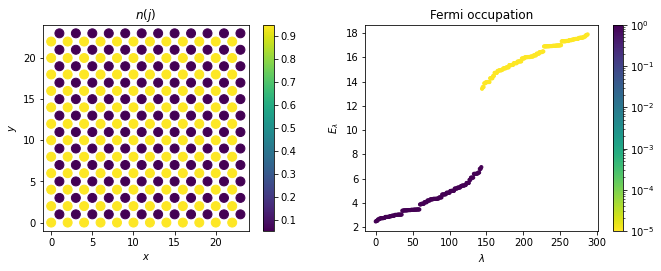

In [ ]:
#hide_input
fig  = plt.figure(figsize=(10, 6/(1.68)))
gs0 = gridspec.GridSpec(1, 2, left=0.1, right=0.99, top=0.85, bottom=0.05, wspace=0.2)

ax = fig.add_subplot(gs0[0])
sc = ax.scatter(un_mf.pos[:,0].flatten(),
                un_mf.pos[:,1].flatten(), c=np.real(un_mf.mfden),  s=80)


ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')
fig.colorbar(sc)
plt.title(r'$n(j)$')
ax2 = fig.add_subplot(gs0[1])
weights = np.zeros(np.size(un_mf.energies))+1E-10
weights[:np.size(un_mf.energies_fermi)] = np.where(un_mf.energies_fermi>1E-10,un_mf.energies_fermi/un_mf.energies[:np.size(un_mf.energies_fermi)],0)
sc = ax2.scatter(np.arange(0,np.size(un_mf.energies)),un_mf.energies, c=((weights)), cmap='viridis_r', s=10, norm=mpl.colors.LogNorm(vmin=1E-5))
plt.title(r'Fermi occupation')
fig.colorbar(sc)
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylabel(r'$E_\lambda$')
plt.show()

## Quantum Anomalous Hall phase

In [ ]:
#hide_output
nx, ny = 12, 12
v1, v2 = 4., 2.5
v3, v4 = Rydberg_v3v4(v1,v2)


un_mf = checkerboard_lattice_un(nx=nx,ny=ny,t0=-1, jax=jax, jay=jay, 
		                        jbx=jbx, jby=jby, v1=v1, v2=v2, v3=v3, v4=v4,
		                        beta=1E+5, cell_filling=1)

l_eta = [0.6,1.]

mb = master_bar(range(len(l_eta)),hide_graph=False)

for  eta in mb:
    for i1 in progress_bar(range(0,50),parent=mb):
        un_mf.iterate_mf()

We then plot the expetation value of the imaginary hopping and the energy spectrum. 

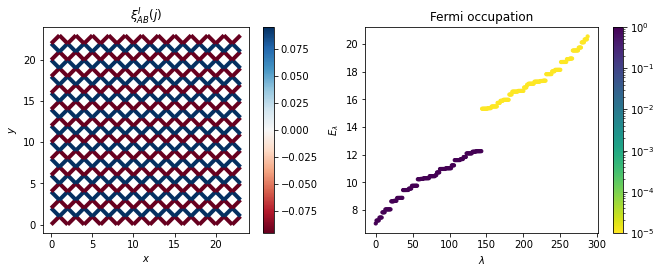

In [ ]:
#hide_input
fig  = plt.figure(figsize=(10, 6/(1.68)))
gs0 = gridspec.GridSpec(1, 2, left=0.1, right=0.99, top=0.85, bottom=0.05, wspace=0.2)

ax = fig.add_subplot(gs0[0])

segment, color, mini, maxi = plot_bonds(un_mf.pos, un_mf.J_nn, np.imag(un_mf.mfhop_nn))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(mini, maxi),
                                linewidths=4, rasterized=True)
 
ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.add_collection(ligne)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(ligne)
ax.set_aspect('equal')
plt.title(r'$\xi_{AB}^I(j)$')

ax2 = fig.add_subplot(gs0[1])
weights = np.zeros(np.size(un_mf.energies))+1E-10
weights[:np.size(un_mf.energies_fermi)] = np.where(un_mf.energies_fermi>1E-10,un_mf.energies_fermi/un_mf.energies[:np.size(un_mf.energies_fermi)],0)
sc = ax2.scatter(np.arange(0,np.size(un_mf.energies)),un_mf.energies, c=((weights)), cmap='viridis_r', s=10, norm=mpl.colors.LogNorm(vmin=1E-5))
plt.title(r'Fermi occupation')
fig.colorbar(sc)
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylabel(r'$E_\lambda$')
plt.show()

## Self-trapped polaron

For a finite hole/particle doping, the unrestricted Hartree-Fock method gives rise to localized solutions due to the appearance of states inside the gap. We here consider the case of one extra particle.

In [ ]:
#hide_output
nx, ny = 12, 12
v1, v2 = 4., 2.5
v3, v4 = Rydberg_v3v4(v1,v2)

cf = (nx*ny+1)/(nx*ny)

un_mf = checkerboard_lattice_un(nx=nx,ny=ny,t0=-1, jax=jax, jay=jay, 
		                        jbx=jbx, jby=jby, v1=v1, v2=v2, v3=v3, v4=v4,
		                        beta=1E+5, cell_filling=cf)

l_eta = [0.6,1.]

mb = master_bar(range(len(l_eta)),hide_graph=False)

for  eta in mb:
    for i1 in progress_bar(range(0,50),parent=mb):
        un_mf.iterate_mf()

We then plot the expetation value of the imaginary hopping and the energy spectrum. We observe the appearance of a self-trapped polaron both in the analysis of the imaginary hopping and of the energy spetrum.

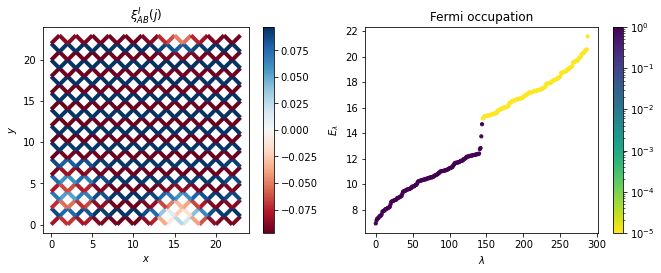

In [ ]:
#hide_input
fig  = plt.figure(figsize=(10, 6/(1.68)))
gs0 = gridspec.GridSpec(1, 2, left=0.1, right=0.99, top=0.85, bottom=0.05, wspace=0.2)

ax = fig.add_subplot(gs0[0])

segment, color, mini, maxi = plot_bonds(un_mf.pos, un_mf.J_nn, np.imag(un_mf.mfhop_nn))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(mini, maxi),
                                linewidths=4, rasterized=True)
 
ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.add_collection(ligne)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(ligne)
ax.set_aspect('equal')
plt.title(r'$\xi_{AB}^I(j)$')

ax2 = fig.add_subplot(gs0[1])
weights = np.zeros(np.size(un_mf.energies))+1E-10
weights[:np.size(un_mf.energies_fermi)] = np.where(un_mf.energies_fermi>1E-10,un_mf.energies_fermi/un_mf.energies[:np.size(un_mf.energies_fermi)],0)
sc = ax2.scatter(np.arange(0,np.size(un_mf.energies)),un_mf.energies, c=((weights)), cmap='viridis_r', s=10, norm=mpl.colors.LogNorm(vmin=1E-5))
plt.title(r'Fermi occupation')
fig.colorbar(sc)
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylabel(r'$E_\lambda$')
plt.show()

## Topological domains

When increasing the number of particles from half filling, the system eventually generates two domains with opposite spontaneous breaking of the time-reversal symmetry

In [ ]:
nx, ny = 24, 24
v1, v2 = 4., 2.5
v3, v4 = Rydberg_v3v4(v1,v2)

cf = (nx*ny+5)/(nx*ny)

un_mf = checkerboard_lattice_un(nx=nx,ny=ny,t0=-1, jax=jax, jay=jay, 
		                        jbx=jbx, jby=jby, v1=v1, v2=v2, v3=v3, v4=v4,
		                        beta=1E+5, cell_filling=cf)

l_eta = [0.6,1.]

mb = master_bar(range(len(l_eta)),hide_graph=False)

for  eta in mb:
    for i1 in progress_bar(range(0,50),parent=mb):
        un_mf.iterate_mf()

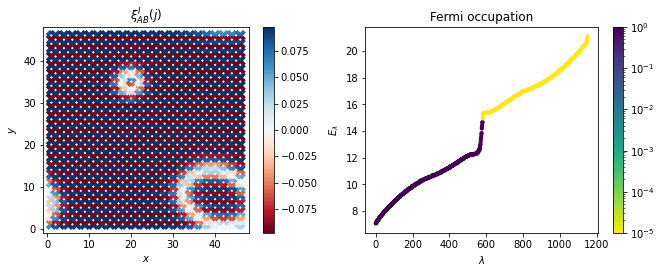

In [ ]:
#hide_input
fig  = plt.figure(figsize=(10, 6/(1.68)))
gs0 = gridspec.GridSpec(1, 2, left=0.1, right=0.99, top=0.85, bottom=0.05, wspace=0.2)

ax = fig.add_subplot(gs0[0])

segment, color, mini, maxi = plot_bonds(un_mf.pos, un_mf.J_nn, np.imag(un_mf.mfhop_nn))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(mini, maxi),
                                linewidths=4, rasterized=True)
 
ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.add_collection(ligne)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(ligne)
ax.set_aspect('equal')
plt.title(r'$\xi_{AB}^I(j)$')

ax2 = fig.add_subplot(gs0[1])
weights = np.zeros(np.size(un_mf.energies))+1E-10
weights[:np.size(un_mf.energies_fermi)] = np.where(un_mf.energies_fermi>1E-10,un_mf.energies_fermi/un_mf.energies[:np.size(un_mf.energies_fermi)],0)
sc = ax2.scatter(np.arange(0,np.size(un_mf.energies)),un_mf.energies, c=((weights)), cmap='viridis_r', s=10, norm=mpl.colors.LogNorm(vmin=1E-5))
plt.title(r'Fermi occupation')
fig.colorbar(sc)
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylabel(r'$E_\lambda$')

plt.show()

## Effect of finite temperature 

For increasing temperature the gap of the quantum anomalous Hall phase closes, and eventually the phase disappears. We first consider the effect of a small temperature $T/t=0.1$, for which no important changes are observed compared to the zero temperature case shown in the first example.

In [ ]:
nx, ny = 12, 12
v1, v2 = 4., 2.5
v3, v4 = Rydberg_v3v4(v1,v2)


un_mf = checkerboard_lattice_un(nx=nx,ny=ny,t0=-1, jax=jax, jay=jay, 
		                        jbx=jbx, jby=jby, v1=v1, v2=v2, v3=v3, v4=v4,
		                        beta=10, cell_filling=1)

l_eta = [0.6,1]

mb = master_bar(range(len(l_eta)),hide_graph=False)

for  eta in mb:
    for i1 in progress_bar(range(0,50),parent=mb):
        un_mf.iterate_mf()

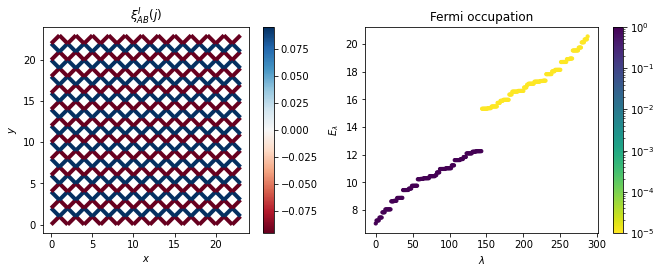

In [ ]:
#hide_input
fig  = plt.figure(figsize=(10, 6/(1.68)))
gs0 = gridspec.GridSpec(1, 2, left=0.1, right=0.99, top=0.85, bottom=0.05, wspace=0.2)

ax = fig.add_subplot(gs0[0])

segment, color, mini, maxi = plot_bonds(un_mf.pos, un_mf.J_nn, np.imag(un_mf.mfhop_nn))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(mini, maxi),
                                linewidths=4, rasterized=True)
 
ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.add_collection(ligne)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(ligne)
ax.set_aspect('equal')
plt.title(r'$\xi_{AB}^I(j)$')

ax2 = fig.add_subplot(gs0[1])
weights = np.zeros(np.size(un_mf.energies))+1E-10
weights[:np.size(un_mf.energies_fermi)] = np.where(un_mf.energies_fermi>1E-10,un_mf.energies_fermi/un_mf.energies[:np.size(un_mf.energies_fermi)],0)
sc = ax2.scatter(np.arange(0,np.size(un_mf.energies)),un_mf.energies, c=((weights)), cmap='viridis_r', s=10, norm=mpl.colors.LogNorm(vmin=1E-5))
plt.title(r'Fermi occupation')
fig.colorbar(sc)
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylabel(r'$E_\lambda$')
plt.show()

The situation is different for $T/t=0.2$ where we observe that the upper band begins to have a finite population.

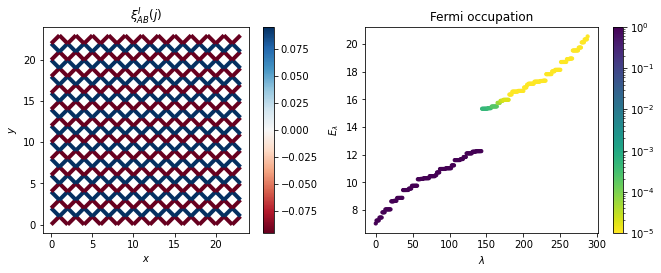

In [ ]:
#hide_input
nx, ny = 12, 12
v1, v2 = 4., 2.5
v3, v4 = Rydberg_v3v4(v1,v2)


un_mf = checkerboard_lattice_un(nx=nx,ny=ny,t0=-1, jax=jax, jay=jay, 
		                        jbx=jbx, jby=jby, v1=v1, v2=v2, v3=v3, v4=v4,
		                        beta=5, cell_filling=1)

l_eta = [0.6,1]

mb = master_bar(range(len(l_eta)),hide_graph=False)

for  eta in mb:
    for i1 in progress_bar(range(0,50),parent=mb):
        un_mf.iterate_mf()

fig  = plt.figure(figsize=(10, 6/(1.68)))
gs0 = gridspec.GridSpec(1, 2, left=0.1, right=0.99, top=0.85, bottom=0.05, wspace=0.2)

ax = fig.add_subplot(gs0[0])

segment, color, mini, maxi = plot_bonds(un_mf.pos, un_mf.J_nn, np.imag(un_mf.mfhop_nn))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(mini, maxi),
                                linewidths=4, rasterized=True)
 
ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.add_collection(ligne)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(ligne)
ax.set_aspect('equal')
plt.title(r'$\xi_{AB}^I(j)$')

ax2 = fig.add_subplot(gs0[1])
weights = np.zeros(np.size(un_mf.energies))+1E-10
weights[:np.size(un_mf.energies_fermi)] = np.where(un_mf.energies_fermi>1E-10,un_mf.energies_fermi/un_mf.energies[:np.size(un_mf.energies_fermi)],0)
sc = ax2.scatter(np.arange(0,np.size(un_mf.energies)),un_mf.energies, c=((weights)), cmap='viridis_r', s=10, norm=mpl.colors.LogNorm(vmin=1E-5))
plt.title(r'Fermi occupation')
fig.colorbar(sc)
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylabel(r'$E_\lambda$')
plt.show()

For $T/t=1$ the quantum anomalous Hall phase has disappeared: the system is not gapped at all and there is no spontaneous time-reversal symmetry breaking in the nearest-neighbors hoppings.

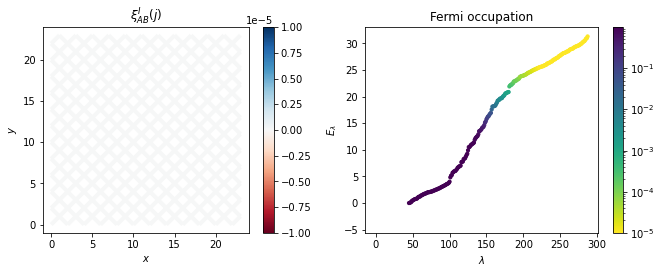

In [ ]:
#hide_input
nx, ny = 12, 12
v1, v2 = 4., 2.5
v3, v4 = Rydberg_v3v4(v1,v2)


un_mf = checkerboard_lattice_un(nx=nx,ny=ny,t0=-1, jax=jax, jay=jay, 
		                        jbx=jbx, jby=jby, v1=v1, v2=v2, v3=v3, v4=v4,
		                        beta=1, cell_filling=1)

mb = master_bar(range(len(l_eta)),hide_graph=False)

for  eta in mb:
    for i1 in progress_bar(range(0,50),parent=mb):
        un_mf.iterate_mf()

fig  = plt.figure(figsize=(10, 6/(1.68)))
gs0 = gridspec.GridSpec(1, 2, left=0.1, right=0.99, top=0.85, bottom=0.05, wspace=0.2)

ax = fig.add_subplot(gs0[0])

segment, color, mini, maxi = plot_bonds(un_mf.pos, un_mf.J_nn, np.imag(un_mf.mfhop_nn))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(-1E-5, +1E-5),
                                linewidths=4, rasterized=True)
 
ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.add_collection(ligne)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(ligne)
ax.set_aspect('equal')
plt.title(r'$\xi_{AB}^I(j)$')

ax2 = fig.add_subplot(gs0[1])
weights = np.zeros(np.size(un_mf.energies))+1E-10
weights[:np.size(un_mf.energies_fermi)] = np.where(un_mf.energies_fermi>1E-10,un_mf.energies_fermi/un_mf.energies[:np.size(un_mf.energies_fermi)],0)
sc = ax2.scatter(np.arange(0,np.size(un_mf.energies)),un_mf.energies, c=((weights)), cmap='viridis_r', s=10, norm=mpl.colors.LogNorm(vmin=1E-5))
plt.title(r'Fermi occupation')
fig.colorbar(sc)
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylabel(r'$E_\lambda$')
plt.show()